<a href="https://colab.research.google.com/github/Darshan0805/ML_LAB/blob/main/Decission_Tree_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_f = pd.read_csv('/content/employee_data (1) 2 - employee_data (1) 2.csv')

In [ ]:
data_f.shape

(14249, 10)

In [ ]:
data_f.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [ ]:
data = data_f.dropna(subset = ['department', 'tenure'])
data

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0


In [ ]:
data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

In [ ]:
data['filed_complaint'] = data['filed_complaint'].fillna(0)
data['last_evaluation'] = data['last_evaluation'].fillna(data['last_evaluation'].mean())
data['recently_promoted'] = data['recently_promoted'].fillna(0)

In [ ]:
data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

Text(0.5, 1.0, 'Tenure Distribution')

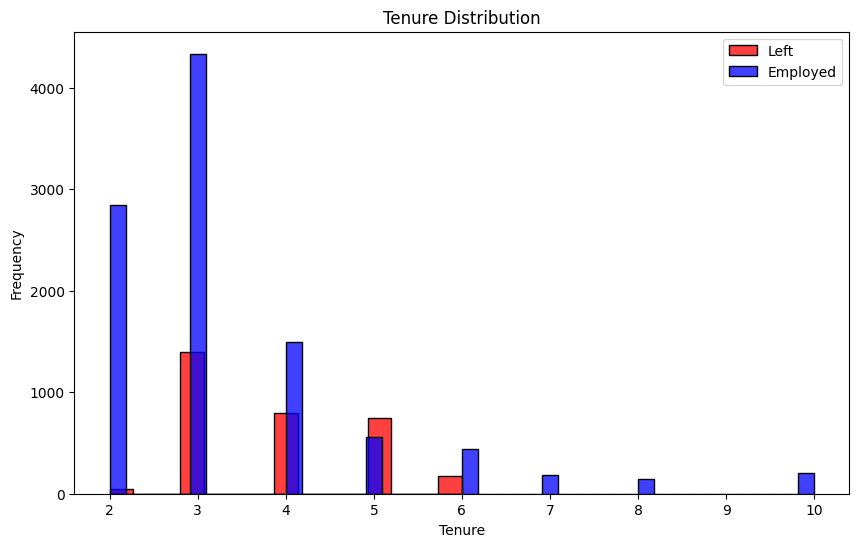

In [ ]:
#Visualising the trend for Tenure and Employment Status
#Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data[data['status'] == 'Left']['tenure'],color = 'red', label = 'Left')
sns.histplot(data[data['status'] == 'Employed']['tenure'],color = 'blue', label = 'Employed')
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title("Tenure Distribution")

<Axes: xlabel='status', ylabel='satisfaction'>

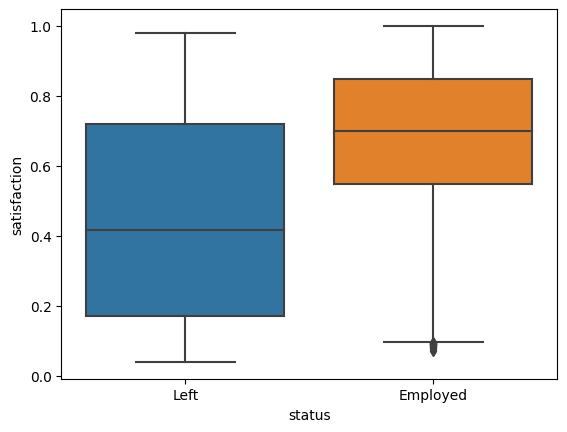

In [ ]:
# Boxplot of satisfaction
sns.boxplot( x='status',y = 'satisfaction',data = data)

Text(0.5, 1.0, 'Satisfaction vs Evaluation')

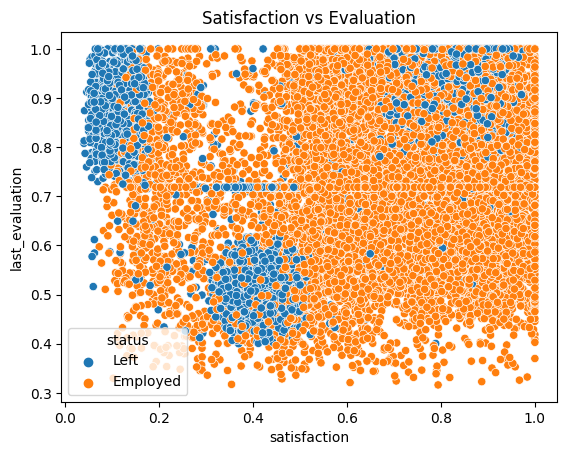

In [ ]:
# Scatter plot of satisfaction vs evaluation
sns.scatterplot(x = 'satisfaction', y = 'last_evaluation', hue = 'status', data = data)
plt.title("Satisfaction vs Evaluation")

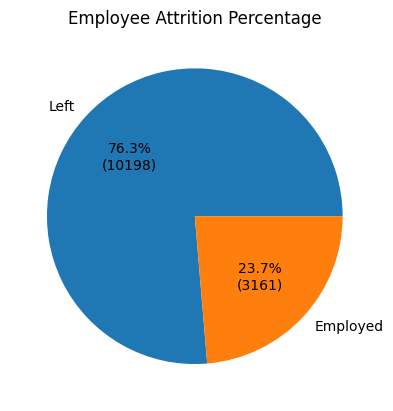

In [ ]:
#Piechart for distibution of attrition
emp_values = data['status'].value_counts()
labels  = ['Left','Employed']
plt.pie(emp_values, labels = labels , autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(emp_values) / 100))
plt.title('Employee Attrition Percentage')
plt.show()

In [ ]:
print(data)

       avg_monthly_hrs   department  filed_complaint  last_evaluation  \
0                  221  engineering              0.0         0.932868   
1                  232      support              0.0         0.718506   
2                  184        sales              0.0         0.788830   
3                  206        sales              0.0         0.575688   
4                  249        sales              0.0         0.845217   
...                ...          ...              ...              ...   
14243              272  engineering              0.0         0.815504   
14244              178           IT              0.0         0.735865   
14245              257        sales              0.0         0.638604   
14246              232      finance              1.0         0.847623   
14247              130           IT              0.0         0.757184   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  
0               4                0.0     low

In [ ]:
#To encode categrorical variables in department, salary and status columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
data['department'] = label_encoder.fit_transform(data['department'])
data['salary'] = label_encoder.fit_transform(data['salary'])
data['status'] = label_encoder.fit_transform(data['status'])

In [ ]:
print(data)

       avg_monthly_hrs  department  filed_complaint  last_evaluation  \
0                  221           2              0.0         0.932868   
1                  232          10              0.0         0.718506   
2                  184           9              0.0         0.788830   
3                  206           9              0.0         0.575688   
4                  249           9              0.0         0.845217   
...                ...         ...              ...              ...   
14243              272           2              0.0         0.815504   
14244              178           0              0.0         0.735865   
14245              257           9              0.0         0.638604   
14246              232           3              1.0         0.847623   
14247              130           0              0.0         0.757184   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  
0               4                0.0       1      0.829896

In [ ]:
#Splitting the data for training and testing (Split is 80,20)
from sklearn.model_selection import train_test_split
X = data.drop(['status'], axis=1)
Y = data['status']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
#Training the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
gini_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=50)
entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=30)
gini_tree.fit(X_train, Y_train)
entropy_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=30)

In [ ]:
#Evaluation of models
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Gini accuracy:', accuracy_score(Y_test, y_pred_gini))
print('Entropy accuracy:', accuracy_score(Y_test, y_pred_entropy))

print('Gini precision:', precision_score(Y_test, y_pred_gini))
print('Entropy precision:', precision_score(Y_test, y_pred_entropy))

print('Gini recall:', recall_score(Y_test, y_pred_gini))
print('Entropy recall:', recall_score(Y_test, y_pred_entropy))

print('Gini F1:', f1_score(Y_test, y_pred_gini))
print('Entropy F1:', f1_score(Y_test, y_pred_entropy))

Gini accuracy: 0.9588323353293413
Entropy accuracy: 0.9655688622754491
Gini precision: 0.9217252396166135
Entropy precision: 0.941747572815534
Gini recall: 0.9043887147335423
Entropy recall: 0.9122257053291536
Gini F1: 0.9129746835443039
Entropy F1: 0.9267515923566878


In [ ]:
from sklearn import tree
featuresf = list(data.columns)
featuresf.remove('status')
print(featuresf)

targetf = 'status'

['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure']


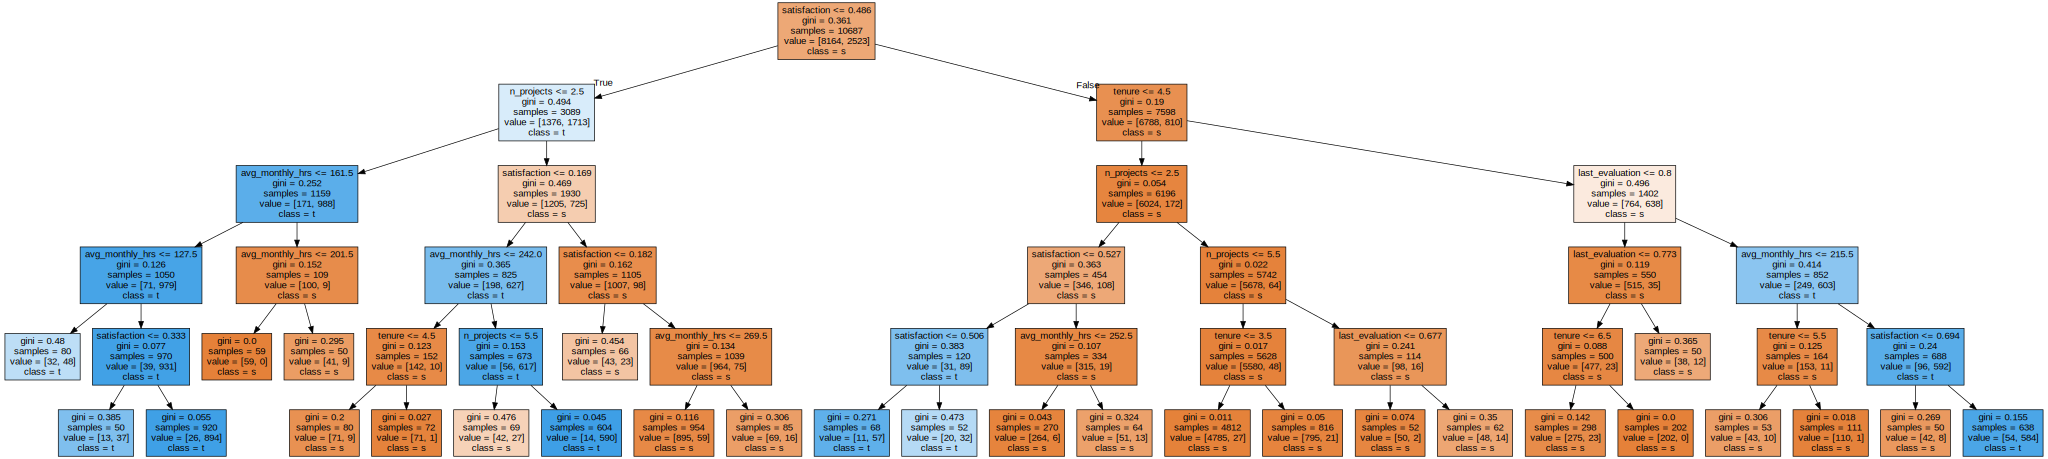

In [ ]:
import graphviz
dot_data = tree.export_graphviz(gini_tree, out_file=None,
                                feature_names=featuresf,
                                class_names=targetf,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph


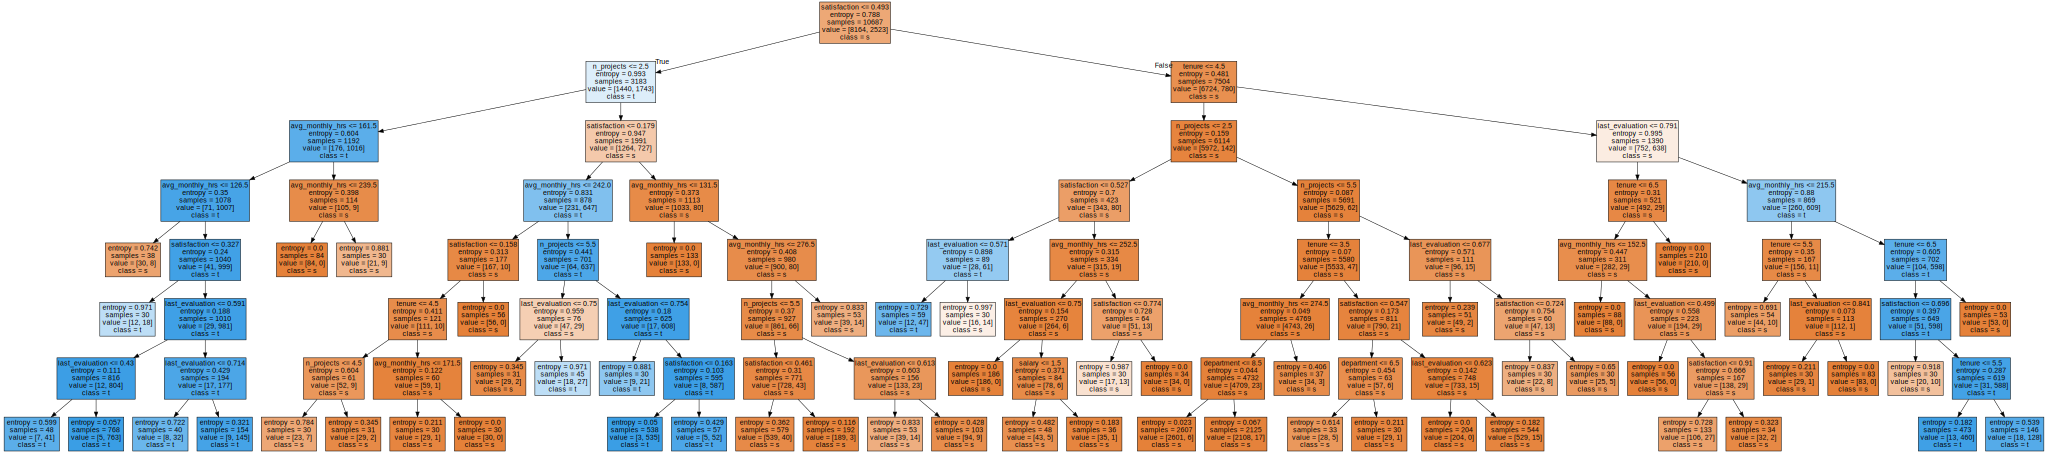

In [ ]:
dot_data = tree.export_graphviz(entropy_tree, out_file=None,
                                feature_names=featuresf,
                                class_names=targetf,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


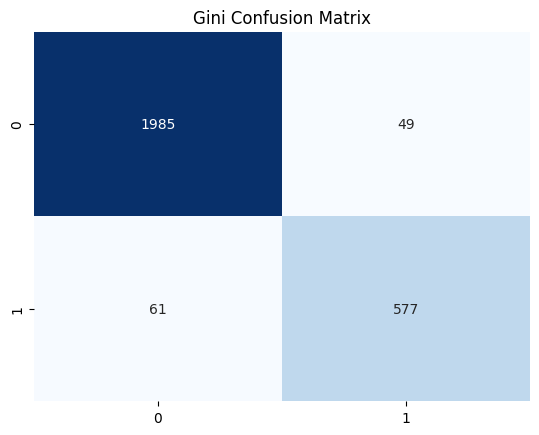

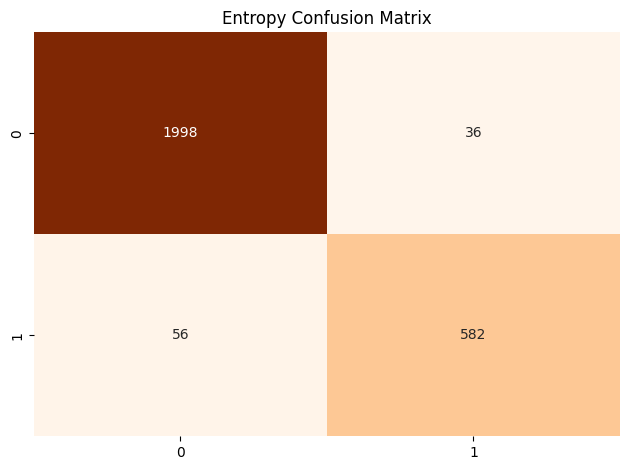

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test, y_pred_gini),
            annot=True, cbar=False, cmap='Blues',
            fmt='d')
plt.title('Gini Confusion Matrix')

plt.show()

sns.heatmap(confusion_matrix(Y_test, y_pred_entropy),
            annot=True, cbar=False, cmap='Oranges',
            fmt='d')
plt.title('Entropy Confusion Matrix')

plt.tight_layout()
plt.show()

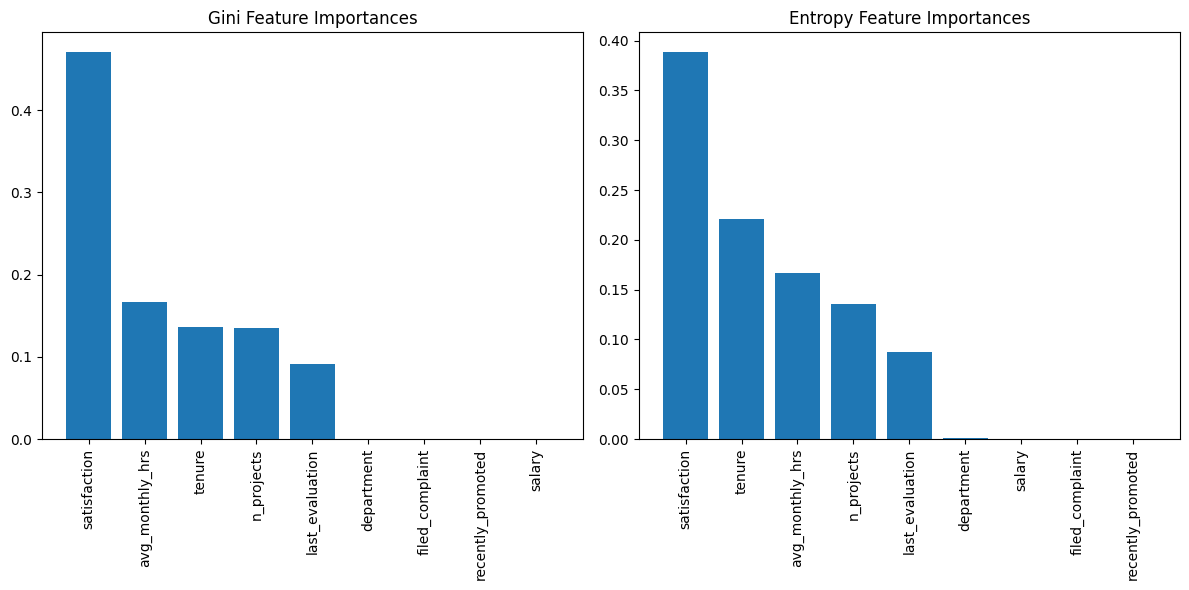

In [ ]:
# Feature Importances
importances_gini = gini_tree.feature_importances_
importances_entropy = entropy_tree.feature_importances_
features = X.columns

# Sorting features by importance
sorted_importances_gini = sorted(zip(features, importances_gini), key=lambda x: x[1], reverse=True)
sorted_importances_entropy = sorted(zip(features, importances_entropy), key=lambda x: x[1], reverse=True)

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(*zip(*sorted_importances_gini))
plt.title('Gini Feature Importances')
plt.xticks(rotation=90)

plt.subplot(122)
plt.bar(*zip(*sorted_importances_entropy))
plt.title('Entropy Feature Importances')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()